In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_csv('/content/All_stocks.csv')

In [3]:
df= df[df['Date']>='2021-01-01']

In [4]:
apple_df = df[df['Name'] == 'Apple']
amazon_df=df[df['Name'] == 'Amazon']
facebook_df=df[df['Name'] == 'Facebook']
google_classA_df=df[df['Name'] == 'Google_classA']
google_classC_df=df[df['Name'] == 'Google_classC']
netflix_df=df[df['Name'] == 'Netflix']


In [5]:
apple_df = apple_df.drop(columns=apple_df.columns.difference(['Date', 'Close']))

amazon_df = amazon_df.drop(columns=amazon_df.columns.difference(['Date', 'Close']))

facebook_df = facebook_df.drop(columns=facebook_df.columns.difference(['Date', 'Close']))

google_classA_df = google_classA_df.drop(columns=google_classA_df.columns.difference(['Date', 'Close']))

google_classC_df = google_classC_df.drop(columns=google_classC_df.columns.difference(['Date', 'Close']))

netflix_df = netflix_df.drop(columns=netflix_df.columns.difference(['Date', 'Close']))

In [6]:
apple_df.columns = ['ds','y']
amazon_df.columns = ['ds','y']
facebook_df.columns = ['ds','y']
google_classA_df.columns = ['ds','y']
google_classC_df.columns = ['ds','y']
netflix_df.columns = ['ds','y']

In [7]:
def fbprophet(df_names):
  # Create the model Object
  model=Prophet()
  # Drop any rows with missing data in the DataFrame
  df_names.dropna(axis=0,inplace=True)
  # Fit the model
  model.fit(df_names)
  # Create a new DataFrame with future dates, up to 365 days in the future
  future_dates=model.make_future_dataframe(periods=365)
  # Generates a prediction for each future date using the model
  prediction=model.predict(future_dates)
  # Plots the prediction using the model's built-in plotting function
  model.plot(prediction)
  # Visualize Each Components[Trends,yearly]
  model.plot_components(prediction)
  # Return the prediction and the trained model object
  return prediction,model


### Apple Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/igo4xgbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/v1blqlvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43575', 'data', 'file=/tmp/tmp3t50mn7d/igo4xgbl.json', 'init=/tmp/tmp3t50mn7d/v1blqlvp.json', 'output', 'file=/tmp/tmp3t50mn7d/prophet_modelu_v2zk2i/prophet_model-20230328004022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


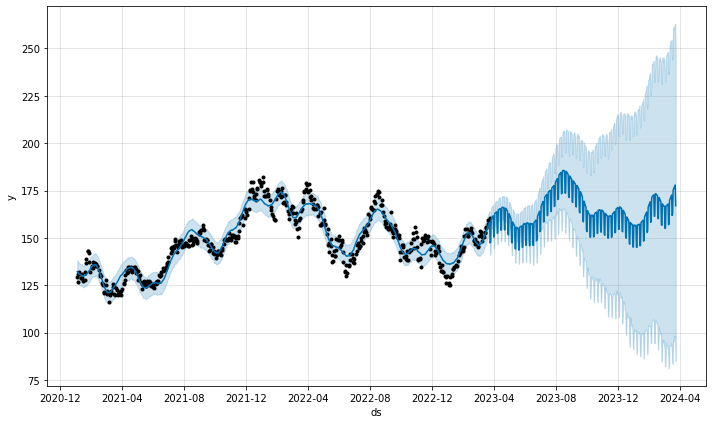

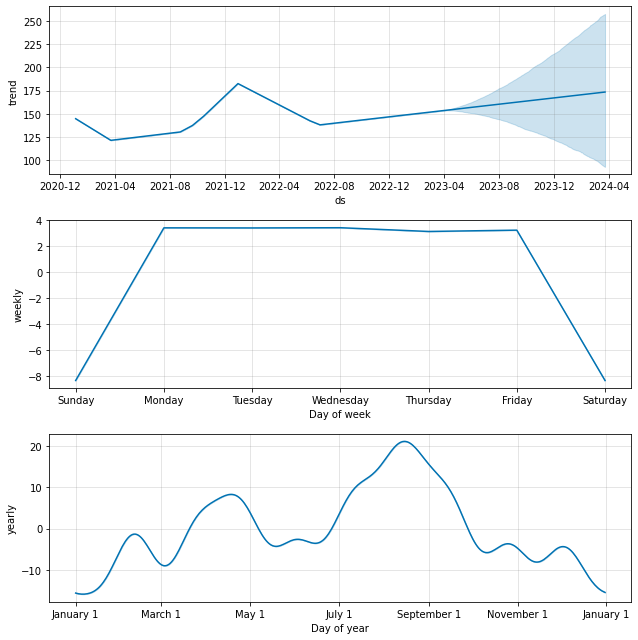

In [8]:
appl_pred,appl_model = fbprophet(apple_df)

In [ ]:
# Cross Validation
appl_cv = cross_validation(appl_model, initial='250 days', period='180 days', horizon = '365 days')

In [10]:
appl_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,148.787738,146.133505,151.221973,145.37,2021-09-25
1,2021-09-28,150.182605,147.713398,152.774201,141.91,2021-09-25
2,2021-09-29,151.636986,149.135727,154.145371,142.83,2021-09-25
3,2021-09-30,153.849336,151.127539,156.521226,141.50,2021-09-25
4,2021-10-01,156.189703,153.604910,158.609415,142.65,2021-09-25


In [11]:
# Performance Metrics
appl_p = performance_metrics(appl_cv)

In [12]:
appl_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,828.349226,28.781057,22.511418,0.150406,0.085774,0.134519,0.06
1,37 days,829.727952,28.804999,22.562861,0.150991,0.091095,0.134962,0.06
2,38 days,830.929213,28.825843,22.663910,0.151650,0.091095,0.135595,0.06
3,39 days,830.776963,28.823202,22.582722,0.151046,0.091095,0.134949,0.08
4,40 days,827.449821,28.765428,22.379180,0.149800,0.089594,0.133648,0.08


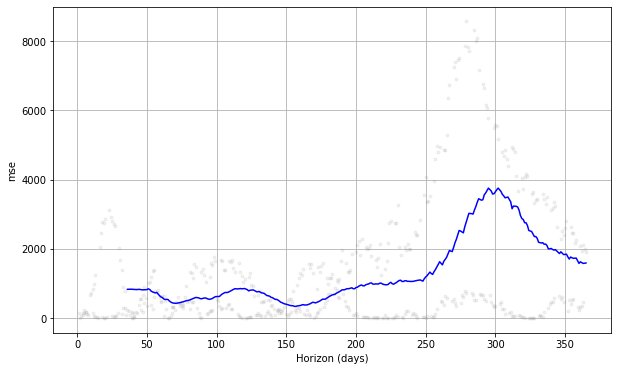

In [13]:
# Plotting 
fig1 = plot_cross_validation_metric(appl_cv, metric='mse')

### Amazon Stock Prediction

In [ ]:
amz_pred,amz_model = fbprophet(amazon_df)

In [ ]:
# Cross Validation - Amazon
amz_cv = cross_validation(amz_model, initial='250 days', period='180 days', horizon = '365 days')

In [ ]:
amz_cv.head()

In [17]:
# Performance Metrics - Amazon
amz_p = performance_metrics(amz_cv)

In [18]:
amz_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,431.092981,20.762779,17.885598,0.112212,0.104168,0.104986,0.08
1,37 days,431.098212,20.762905,17.885830,0.112204,0.104168,0.104885,0.08
2,38 days,432.678536,20.800926,18.048078,0.113186,0.104168,0.105839,0.06
3,39 days,458.362456,21.409401,18.506594,0.117490,0.117075,0.109309,0.08
4,40 days,482.728509,21.971083,18.903926,0.121442,0.125667,0.112388,0.08


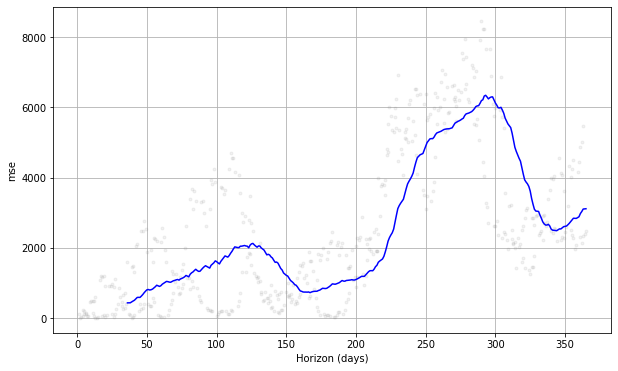

In [19]:
# Plotting - Amazon
fig2 = plot_cross_validation_metric(amz_cv, metric='mse')

### Facebook Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/pjk_bttb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/da3bdbqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43643', 'data', 'file=/tmp/tmp3t50mn7d/pjk_bttb.json', 'init=/tmp/tmp3t50mn7d/da3bdbqi.json', 'output', 'file=/tmp/tmp3t50mn7d/prophet_modelthq54k_q/prophet_model-20230328004033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


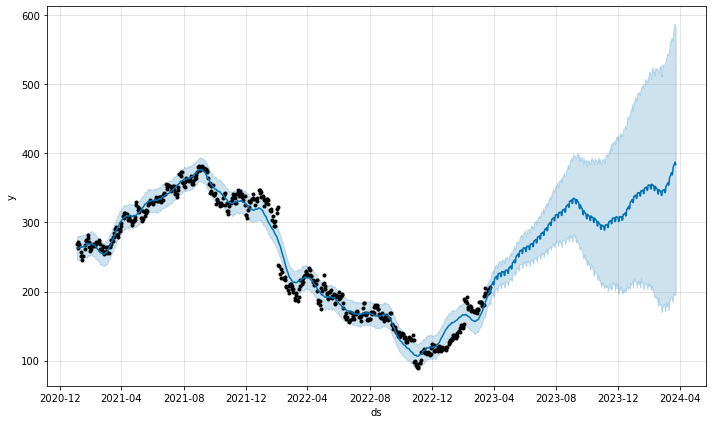

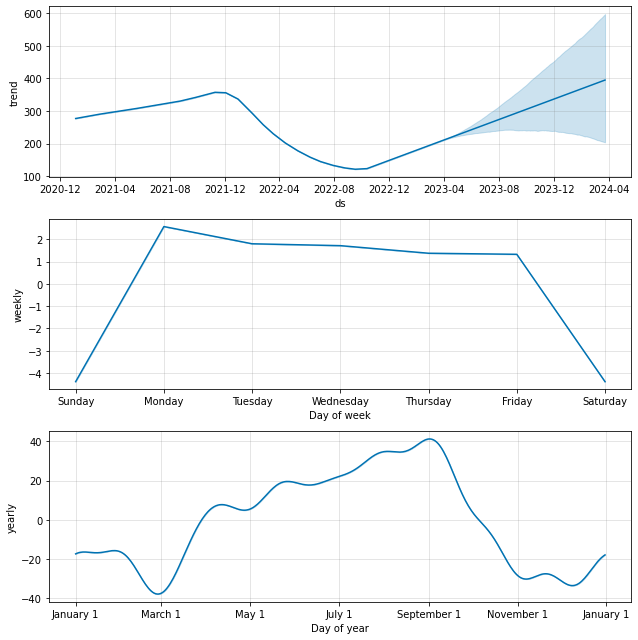

In [20]:
fb_pred,fb_model = fbprophet(facebook_df)

In [ ]:
# Cross Validation - Facebook
fb_cv = cross_validation(fb_model, initial='250 days', period='180 days', horizon = '365 days')

In [22]:
fb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,356.631492,348.783155,364.878620,353.58,2021-09-25
1,2021-09-28,360.970725,352.338750,368.886450,340.65,2021-09-25
2,2021-09-29,365.448661,357.570843,374.124466,339.61,2021-09-25
3,2021-09-30,372.697137,365.062613,380.206187,339.39,2021-09-25
4,2021-10-01,381.748134,374.308585,390.251824,343.01,2021-09-25


In [23]:
# Performance Metrics - Facebook
fb_p = performance_metrics(fb_cv)

In [24]:
fb_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,16542.746014,128.618607,87.553297,0.278252,0.098985,0.222205,0.22
1,37 days,16703.808052,129.243213,89.044574,0.282277,0.102635,0.225499,0.22
2,38 days,16799.708362,129.613689,90.369809,0.286330,0.106716,0.229148,0.20
3,39 days,16832.957731,129.741889,90.949193,0.288914,0.112702,0.231841,0.20
4,40 days,16830.588037,129.732756,90.855091,0.289188,0.117772,0.232333,0.20


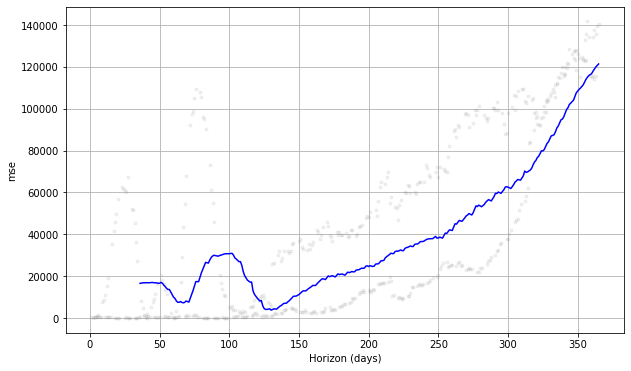

In [25]:
# Plotting - Facebook
fig3 = plot_cross_validation_metric(fb_cv, metric='mse')

### Google Class A Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/v29q23da.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/mburyru9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44822', 'data', 'file=/tmp/tmp3t50mn7d/v29q23da.json', 'init=/tmp/tmp3t50mn7d/mburyru9.json', 'output', 'file=/tmp/tmp3t50mn7d/prophet_model3o0clwpq/prophet_model-20230328004042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


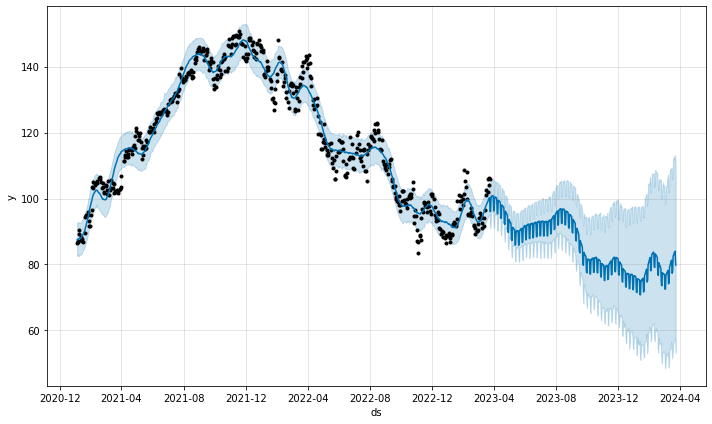

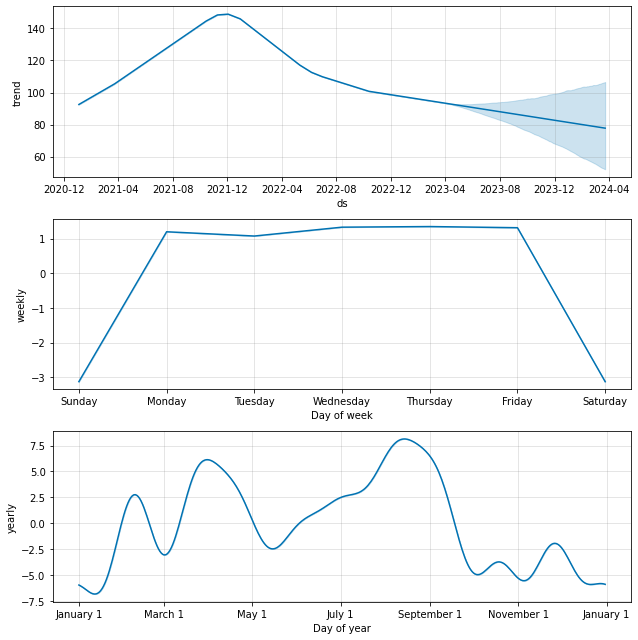

In [26]:
ga_pred,ga_model = fbprophet(google_classA_df)

In [ ]:
# Cross Validation - Google A
ga_cv = cross_validation(ga_model, initial='250 days', period='180 days', horizon = '365 days')

In [28]:
ga_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,142.406028,140.346893,144.520219,141.50,2021-09-25
1,2021-09-28,142.822932,140.649947,145.042648,136.18,2021-09-25
2,2021-09-29,143.595408,141.548830,145.936219,134.52,2021-09-25
3,2021-09-30,144.463689,142.359834,146.687740,133.27,2021-09-25
4,2021-10-01,145.426166,143.157826,147.687756,136.46,2021-09-25


In [29]:
# Performance Metrics - Google A
ga_p = performance_metrics(ga_cv)

In [30]:
ga_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,217.178218,14.736968,12.618592,0.096531,0.088761,0.090510,0.08
1,37 days,217.284191,14.740563,12.626709,0.096573,0.088761,0.090510,0.08
2,38 days,217.654727,14.753126,12.696560,0.097048,0.088761,0.090977,0.06
3,39 days,233.373597,15.276570,13.072695,0.100491,0.089038,0.093879,0.06
4,40 days,246.733713,15.707760,13.340386,0.103095,0.089756,0.095989,0.08


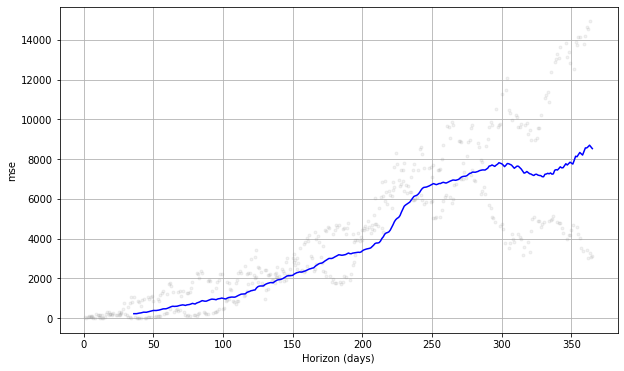

In [31]:
# Plotting - Google A
fig4 = plot_cross_validation_metric(ga_cv, metric='mse')

### Google Class C Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/rfjbx63_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/7nw7moax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10764', 'data', 'file=/tmp/tmp3t50mn7d/rfjbx63_.json', 'init=/tmp/tmp3t50mn7d/7nw7moax.json', 'output', 'file=/tmp/tmp3t50mn7d/prophet_modelm3_941u5/prophet_model-20230328004046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


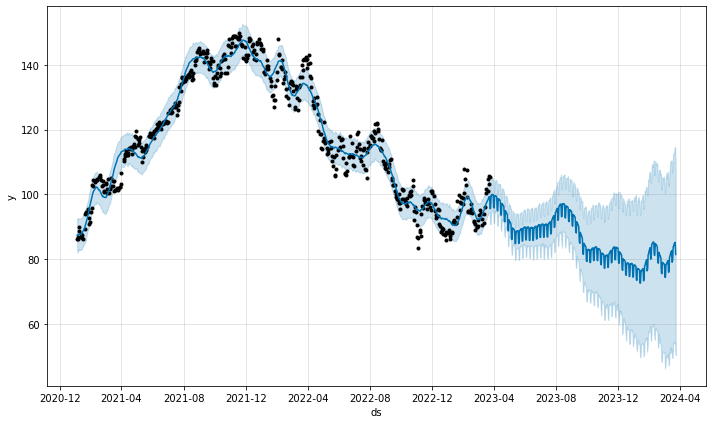

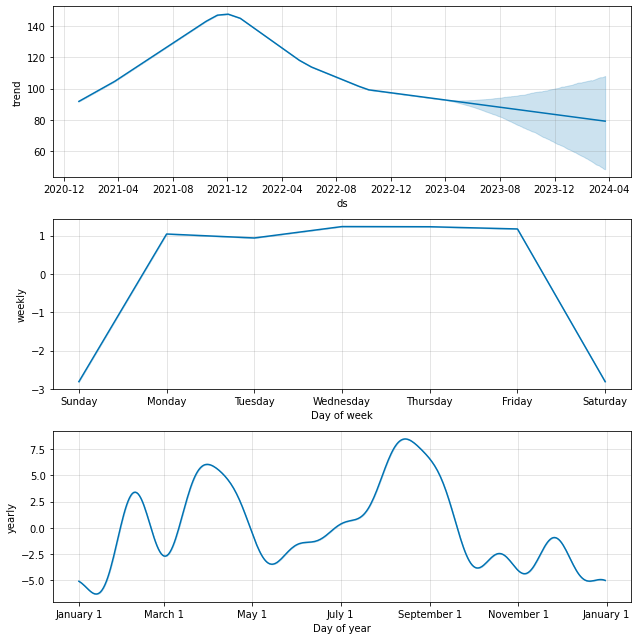

In [32]:
gc_pred,gc_model = fbprophet(google_classC_df)

In [ ]:
# Cross Validation - Google C
gc_cv = cross_validation(gc_model, initial='250 days', period='180 days', horizon = '365 days')

In [34]:
gc_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,143.732977,141.611832,145.889444,141.07,2021-09-25
1,2021-09-28,144.744977,142.523291,146.885609,135.83,2021-09-25
2,2021-09-29,146.302193,144.029572,148.557713,134.35,2021-09-25
3,2021-09-30,147.851082,145.714152,150.070521,133.68,2021-09-25
4,2021-10-01,149.611093,147.429444,151.796527,136.54,2021-09-25


In [35]:
# Performance Metrics - Google C
gc_p = performance_metrics(gc_cv)

In [36]:
gc_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,425.683758,20.632105,18.039457,0.135422,0.132149,0.124625,0.06
1,37 days,425.938812,20.638285,18.056532,0.135528,0.132149,0.124676,0.06
2,38 days,426.102680,20.642255,18.081464,0.135688,0.132149,0.124833,0.06
3,39 days,438.464130,20.939535,18.303913,0.138006,0.143498,0.126700,0.08
4,40 days,448.908686,21.187465,18.487472,0.139981,0.153435,0.128263,0.10


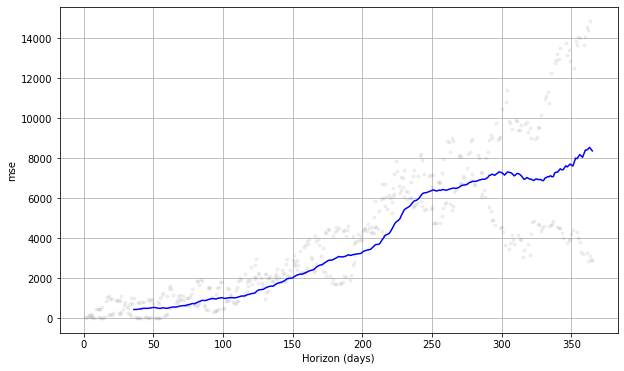

In [37]:
# Plotting - Google C
fig5 = plot_cross_validation_metric(gc_cv, metric='mse')

### Netflix Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/kfq_6v78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t50mn7d/7modx07l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84667', 'data', 'file=/tmp/tmp3t50mn7d/kfq_6v78.json', 'init=/tmp/tmp3t50mn7d/7modx07l.json', 'output', 'file=/tmp/tmp3t50mn7d/prophet_modelspagkw2y/prophet_model-20230328004049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:40:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:40:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


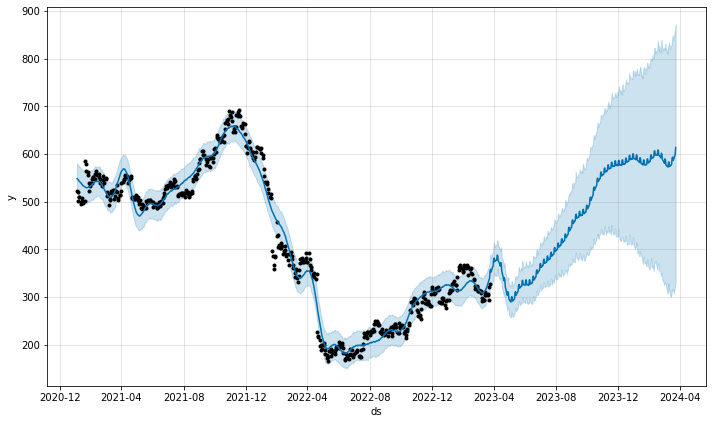

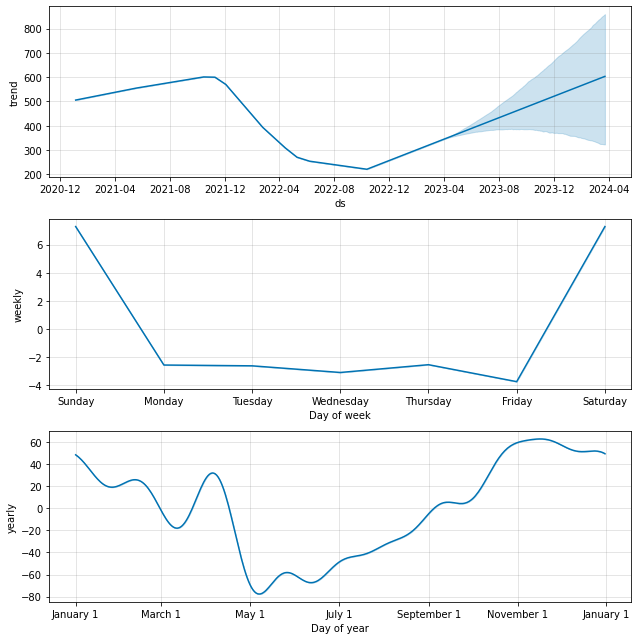

In [38]:
net_pred,net_model = fbprophet(netflix_df)

In [ ]:
# Cross Validation - Netflix
net_cv = cross_validation(net_model, initial='250 days', period='180 days', horizon = '365 days')

In [40]:
net_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-27,626.577149,613.108581,640.708327,592.64,2021-09-25
1,2021-09-28,642.084743,628.218672,655.352373,583.85,2021-09-25
2,2021-09-29,657.671956,644.498959,670.492306,599.06,2021-09-25
3,2021-09-30,678.351489,665.469640,691.295429,610.34,2021-09-25
4,2021-10-01,699.729587,686.551636,712.921665,613.15,2021-09-25


In [41]:
# Performance Metrics - Netflix
net_p = performance_metrics(net_cv)

In [42]:
net_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,45719.375559,213.820896,159.444887,0.340461,0.274376,0.267007,0.18
1,37 days,45733.606473,213.854171,159.787100,0.340668,0.274376,0.267222,0.16
2,38 days,45823.676426,214.064655,160.612382,0.341742,0.274376,0.268458,0.16
3,39 days,46476.287731,215.583598,164.243536,0.356301,0.291249,0.280017,0.15
4,40 days,47306.491443,217.500555,168.686002,0.372099,0.316089,0.293021,0.13


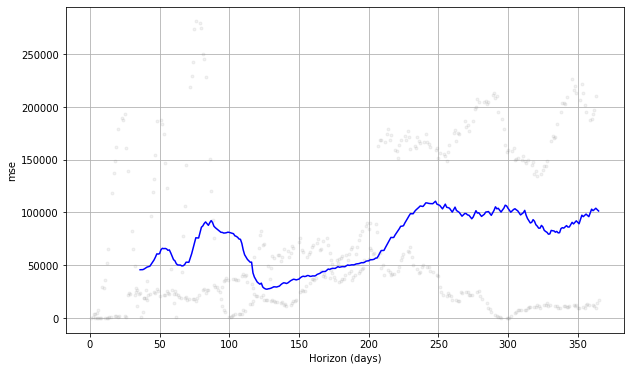

In [43]:
# Plotting - Netflix
fig6 = plot_cross_validation_metric(net_cv, metric='mse')